# City Salary Data Analyis
One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.

# Exploration Ideas

* How have salaries changed over time between different groups of people?
* How are base pay, overtime pay, and benefits allocated between   different groups?
* Is there any evidence of pay discrimination based on gender in this dataset?
* How is budget allocated based on different groups and responsibilities?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data

In [2]:
salaries = pd.read_csv('../data/Salaries.csv', low_memory=False)
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## 1. Basic data study

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [4]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


#### What are your observations about the basic statistics of data?

Insight:
- data cleaning - Pay cols have str data, there -ve salaries
- Notes, Id, no value
- benfits play role
- data is from 2011 to 2014

## 2. What columns do you think do not add value to our analysis? 
Drop those columns.

In [5]:
salaries.shape

(148654, 13)

In [6]:
salaries.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109724
OvertimePay          66162
OtherPay             84243
Benefits             98647
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

`Id`, `Notes`, `Status`, `Agency` seems empty or have unqiue value for each row, it is safe to assume these do not add value and that we can drop them

In [7]:
salaries.drop(['Id', 'Notes', 'Status' , 'Agency'], axis = 1, inplace=True)
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011


## 3. Check for missing values in the data. 
What is the strategy you will apply to deal with missing values?

Typically we can either impute or remove the null values, lets inspect which columns have null values, however it is often best to **check with the business team**, if you are going to make any assumptions.

In [8]:
salaries.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [9]:
salaries.loc[salaries.BasePay.isnull(), :]
# salaries[salaries.BasePay.isnull()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
81391,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013
84506,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013
84960,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013
90525,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013
90786,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013
...,...,...,...,...,...,...,...,...,...
110526,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.0,10.67,10.67,2013
110527,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013
110528,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013
110529,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013


In [10]:
salaries.loc[salaries.Benefits.isnull(), :]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
36154,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.0,0.0,4.17,NaN,4.17,4.17,2011
36155,JOE BROWN JR,TRANSIT OPERATOR,0.0,0.0,0.3,NaN,0.30,0.30,2011
36156,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.00,0.00,2011
36157,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.00,0.00,2011


### It is safe to assume, that not all roles would get benefits, so we can impute null values with `0` 

In [11]:
salaries.Benefits.fillna(0, inplace=True)
salaries.Benefits.isnull().sum()

0

In [12]:
salaries.isnull().sum()

EmployeeName          0
JobTitle              0
BasePay             605
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
dtype: int64

### Also, since the percentage of records with missing `BasePay` is very low, we can safely remove these from our analysis.

In [13]:
salaries.dropna(inplace=True)
salaries.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [14]:
salaries.shape

(148049, 9)

## 4. Convert the object values of all the types of pays to numeric, use to_numeric method of pandas to convert. 
Is it as straightforward or there is some descripency? if yes, how will you overcome it?

In [15]:
salaries.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [16]:
salaries.loc[salaries.Benefits == 'Not Provided', :]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


### To convert one column with mixed type, use `pd.to_numeric` 
pass `errors='coerce'` to replace any non-numeric value to `NaN`

In [17]:
pd.to_numeric(salaries.Benefits, errors='coerce')

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
148649    0.0
148650    NaN
148651    NaN
148652    NaN
148653    0.0
Name: Benefits, Length: 148049, dtype: float64

### Lets convert all the columns

In [18]:
for column in ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']:
    salaries[column] = pd.to_numeric(salaries[column], errors='coerce')

In [19]:
salaries.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

## 5. Find the job titles of the 10 highest median base pay.

Base Pay -> The most basic sum of money or hourly rate paid to an employee of a business in compensation for their work efforts or time spent on the job

In [20]:
salaries['jobtitle'] = salaries.JobTitle.str.lower()

In [21]:
salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,jobtitle
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,general manager-metropolitan transit authority
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,captain iii (police department)
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,captain iii (police department)
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,wire rope cable maintenance mechanic
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,"deputy chief of department,(fire department)"


In [22]:
(salaries
 .groupby('jobtitle')['BasePay']
 .median()
 .round(2)
 .nlargest(10)
)

jobtitle
chief of police                           305014.02
chief, fire department                    302068.00
gen mgr, public trnsp dept                294000.18
chief of department, (fire department)    285262.00
dep dir for investments, ret              276153.76
dept head v                               270616.27
adm, sfgh medical center                  268946.02
controller                                267914.00
deputy chief 3                            263408.55
dep chf of dept (fire dept)               260728.00
Name: BasePay, dtype: float64

## 6. Find the job titles of the 10 highest median Overtime Pay.


Overtime Pay -> Additional financial compensation for any hours worked by nonexempt staff over the amount of forty hours per week.

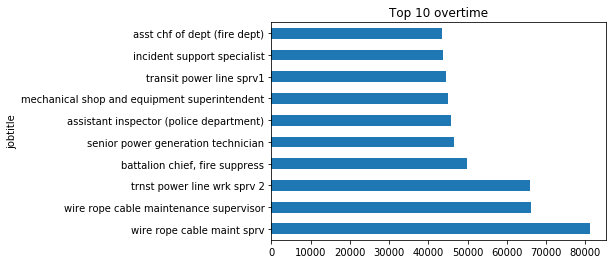

In [23]:
salaries.groupby('jobtitle')['OvertimePay'].median().round(2).nlargest(10).plot.barh(title='Top 10 overtime')

## 7. Plot the sectors which have provided the maximum  number of employment

In [24]:
salaries.loc[0,:]

EmployeeName                                        NATHANIEL FORD
JobTitle            GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
BasePay                                                     167411
OvertimePay                                                      0
OtherPay                                                    400184
Benefits                                                         0
TotalPay                                                    567595
TotalPayBenefits                                            567595
Year                                                          2011
jobtitle            general manager-metropolitan transit authority
Name: 0, dtype: object

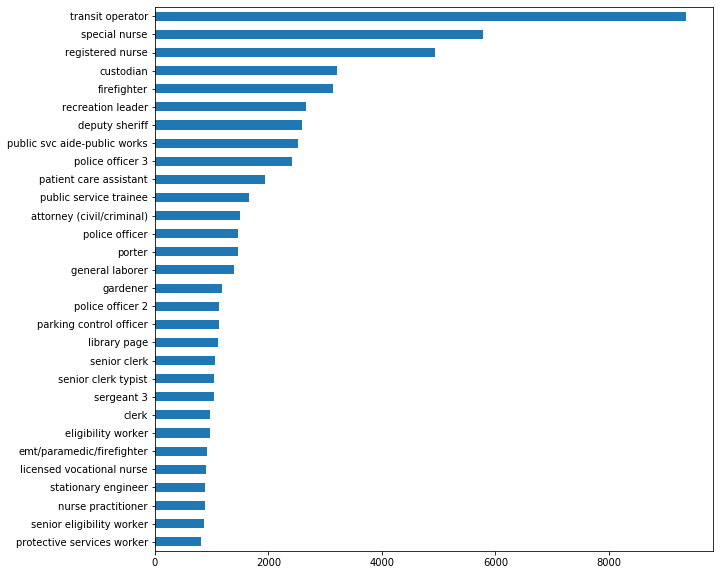

In [25]:
(salaries
 .jobtitle
 .value_counts()
 .nlargest(30)
 .sort_values()
 .plot.barh(figsize=(10,10))
)

## 8. Plot the top 10 Job titles with highest mean TotalPayBenefits

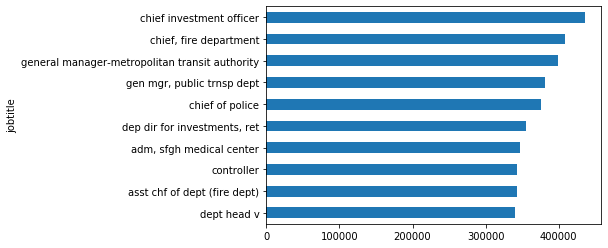

In [26]:
(salaries
 .groupby('jobtitle')['TotalPayBenefits']
 .mean()
 .round(2)
 .nlargest(10)
 .plot.barh().invert_yaxis()
)

## 9. Find the highest paid employees for the year 2012, 2013 and 2014



In [27]:
high_paid_emp = (salaries
                 .loc[salaries.Year.isin([2012,2013,2014]),:] # filter required years 
                 .groupby(['Year'])['TotalPay']
                 .nlargest() # by default top 5
                 .index
                 .get_level_values(-1) # index values of last level, in this case row index of highest salaries individuals
                )
salaries.loc[high_paid_emp, ['Year','EmployeeName','TotalPay']]

,Year,EmployeeName,TotalPay
36159,2012,Gary Altenberg,362844.66
36167,2012,John Goldberg,350403.41
36163,2012,Frederick Binkley,337204.86
36161,2012,Khoa Trinh,336393.73
36173,2012,Mark Kearney,327689.78
72927,2013,Samson Lai,347102.32
72925,2013,Gregory P Suhr,339282.07
72926,2013,Joanne M Hayes-White,336922.01
72928,2013,Ellen G Moffatt,335537.96
72930,2013,David L Franklin,333888.32
